# Importing Library

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
A = pd.read_csv("D:/DataSet/csvdata/USA_cars_datasets.csv")

In [155]:
A.isna().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [4]:
A.sample(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
1599,1599,22500,ford,transit,2019,clean vehicle,25623.0,white,1ftyr2cm5kkb17292,167745536,pennsylvania,usa,2 days left
2077,2077,8500,ford,connect,2015,clean vehicle,118483.0,white,nm0ls6e75f1193116,167746107,florida,usa,14 hours left
758,758,3000,chevrolet,door,2012,clean vehicle,111856.0,white,1gccsbf92c8121126,167733652,california,usa,5 hours left
1508,1508,22800,ford,f-150,2019,clean vehicle,16770.0,white,1ftmf1c55kkd08124,167787224,oklahoma,usa,21 hours left
1852,1852,43400,ford,max,2019,clean vehicle,37355.0,gray,1fmjk2at4kea20188,167801382,florida,usa,2 days left


In [5]:
A = A.drop(labels=["Unnamed: 0"],axis=1)

In [9]:
Q = A[["price","mileage"]]

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Q1 = pd.DataFrame(ss.fit_transform(Q),columns=Q.columns)

# Kmean

In [29]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(Q1)
    wcss.append(kmeans.inertia_)

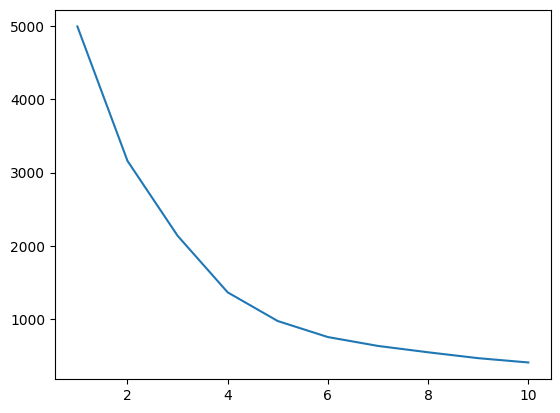

In [30]:
plt.plot(range(1,11),wcss)

In [111]:
kmean = KMeans(n_clusters=8)
model = kmean.fit(Q1)
model.labels_

array([5, 5, 0, ..., 0, 0, 0])

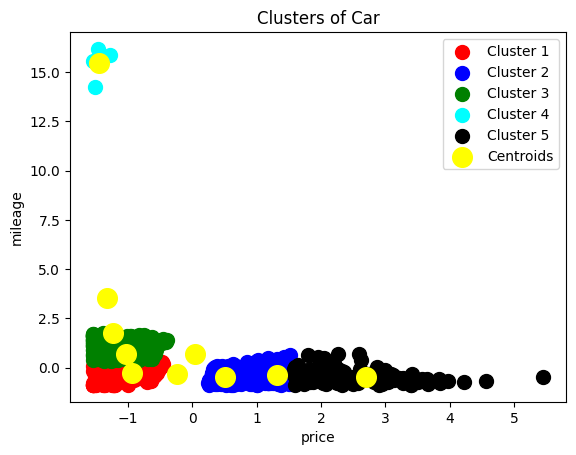

In [159]:
plt.scatter(Q1.values[model.labels_ == 0, 0], Q1.values[model.labels_ == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Q1.values[model.labels_ == 1, 0], Q1.values[model.labels_ == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Q1.values[model.labels_ == 2, 0], Q1.values[model.labels_ == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Q1.values[model.labels_ == 3, 0], Q1.values[model.labels_ == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(Q1.values[model.labels_ == 4, 0], Q1.values[model.labels_ == 4, 1], s = 100, c = 'black', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Car')
plt.xlabel('price')
plt.ylabel('mileage')
plt.legend()
plt.show()


In [50]:
A

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [112]:
Q['Cluster']=model.labels_
Q['Model']=A.model
Q['Make']=A.brand

In [121]:
Q[Q.Cluster == 5]

,price,mileage,Cluster,Model,Make
0,6300,274117.0,5,cruiser,toyota
1,2899,190552.0,5,se,ford
39,7000,176567.0,5,pk,ford
141,0,177948.0,5,van,dodge
149,6700,204155.0,5,cutaway,ford
...,...,...,...,...,...
2281,1280,162176.0,5,door,nissan
2284,600,206142.0,5,door,nissan
2294,2000,159990.0,5,door,nissan
2410,2425,161836.0,5,door,nissan


# Output

In [158]:
a = input("Enter Car Name: ")
cs = Q[Q.Make==a].Cluster.values[0]
T = list(Q[Q.Cluster==cs]["Make"].values)
R = list(Q[Q.Cluster==cs]["Model"].values)
P = list(Q[Q.Cluster==cs]["price"].values)
# T.remove(a)
for i in range(0,20):
    print(T[i],R[i],P[i])

Enter Car Name: bmw
chevrolet 1500 27700
chevrolet 1500 31900
chevrolet camaro 29800
chevrolet 1500 30500
buick enclave 27000
chrysler pacifica 23000
chrysler pacifica 29100
bmw x3 29400
buick door 26400
bmw door 24500
ford door 34000
chevrolet colorado 26502
cadillac door 23605
cadillac door 25201
dodge durango 23100
cadillac door 24500
chevrolet 1500 34002
dodge charger 25000
chrysler pacifica 26500
chevrolet colorado 24802
